## Image Classification


Image classification is one of the important use cases in our daily life. Automotive, e-commerce, retail, manufacturing industries, security, surveillance, healthcare, farming etc., can have a wide application of image classification.

**Objective:** In this notebook, we will build a neural network to classifiy the image based on the object present in the image.



## Advanced techniques for training neural networks

Weight Initialization

Nonlinearity (different Activation functions)

Optimizers(different optimizers)

Batch Normalization

Dropout

### About Dataset


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

#### Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot 

### Load dataset

Fashion-MNIST dataset

source: https://www.kaggle.com/zalando-research/fashionmnist


In [0]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


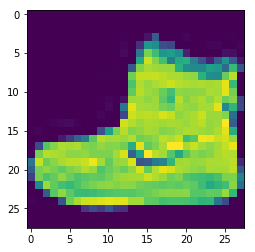

Label:  9


In [0]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])


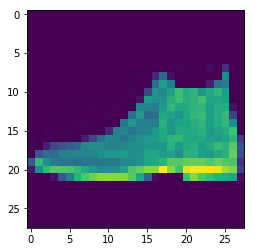

Label:  9


In [0]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

### Data Pre-processing

In [0]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [0]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


### Basic NN model

Naive MLP model without any alterations

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [0]:
model = Sequential()

In [0]:
  model.add(Dense(50, input_shape = (784, )))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

In [0]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
60000/60000 [==============================] - 1s 23us/step - loss: 2.3176 - acc: 0.1287
Epoch 2/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2931 - acc: 0.2033
Epoch 3/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2897 - acc: 0.2139
Epoch 4/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2862 - acc: 0.2768
Epoch 5/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2822 - acc: 0.2978
Epoch 6/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2775 - acc: 0.3063
Epoch 7/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2718 - acc: 0.3042
Epoch 8/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2647 - acc: 0.3345
Epoch 9/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2554 - acc: 0.3743
Epoch 10/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2435 - a

In [0]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 57us/step


In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7749


### 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

Ref: https://keras.io/initializers/

In [0]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
60000/60000 [==============================] - 1s 23us/step - loss: 2.4905 - acc: 0.1000
Epoch 2/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.3740 - acc: 0.1000
Epoch 3/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.3281 - acc: 0.1000
Epoch 4/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.3080 - acc: 0.1010
Epoch 5/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2989 - acc: 0.1205
Epoch 6/100
60000/60000 [==============================] - 1s 16us/step - loss: 2.2944 - acc: 0.1573
Epoch 7/100
60000/60000 [==============================] - 1s 16us/step - loss: 2.2920 - acc: 0.2066
Epoch 8/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2905 - acc: 0.2394
Epoch 9/100
60000/60000 [==============================] - 1s 16us/step - loss: 2.2894 - acc: 0.2739
Epoch 10/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2884 - a

In [0]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 54us/step


In [0]:
print('Test accuracy: ', results[1])


Test accuracy:  0.5497


### 2. Nonlinearity (Activation function)

Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; try many of them!

'relu' (rectified linear unit) is one of the most popular ones

Ref: https://keras.io/activations/

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
60000/60000 [==============================] - 7s 113us/step - loss: 6.6232 - acc: 0.4382
Epoch 2/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.6876 - acc: 0.7587
Epoch 3/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.5735 - acc: 0.7972
Epoch 4/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.5295 - acc: 0.8101
Epoch 5/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.5013 - acc: 0.8189
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.4809 - acc: 0.8258
Epoch 7/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.4658 - acc: 0.8295
Epoch 8/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.4532 - acc: 0.8355
Epoch 9/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.4428 - acc: 0.8383
Epoch 10/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.4331 - acc: 0.84

In [0]:
results = model.evaluate(X_test, y_test)


10000/10000 [==============================] - 1s 53us/step


In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.815


### 3. Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

Ref: https://keras.io/optimizers/

In [0]:
from keras.layers import BatchNormalization, Dropout


Batch normalization layer is usually inserted after dense/convolution and before nonlinearity



In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 20, verbose = 1)


Epoch 1/20
60000/60000 [==============================] - 16s 264us/step - loss: 1.3378 - acc: 0.5872
Epoch 2/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.8461 - acc: 0.7412
Epoch 3/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.7146 - acc: 0.7725
Epoch 4/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.6482 - acc: 0.7892
Epoch 5/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.6021 - acc: 0.8005
Epoch 6/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.5737 - acc: 0.8088
Epoch 7/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.5467 - acc: 0.8146
Epoch 8/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.5264 - acc: 0.8215
Epoch 9/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.5104 - acc: 0.8253
Epoch 10/20
60000/60000 [==============================] - 14s 239us/step - loss: 

In [0]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 92us/step


In [0]:
print('Test accuracy: ', results[1])


Test accuracy:  0.8588


### Dropout

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.8453 - acc: 0.7140
Epoch 2/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.5950 - acc: 0.7980
Epoch 3/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.5447 - acc: 0.8143
Epoch 4/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.5138 - acc: 0.8240
Epoch 5/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.4906 - acc: 0.8302
Epoch 6/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.4807 - acc: 0.8339
Epoch 7/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.4639 - acc: 0.8394
Epoch 8/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.4592 - acc: 0.8435
Epoch 9/10
60000/60000 [==============================] - 19s 314us/s

In [0]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 106us/step


In [0]:
print('Test accuracy: ', results[1])


Test accuracy:  0.8653
